In this project I will be working on predicting if a survivor lived or died if they were on the Titanic based on a variety of factors. I will organize the data, create a few models to get a better idea of the data and finally predict whether they lived or died.

CSV files are not included in the this repo.Instead, they can be found on kaggle at https://www.kaggle.com/competitions/titanic/data
CSV files are renamed titanic_results.csv, titanic_test.csv, and titanic_train.csv


In [304]:
import pandas as pd

print("Packages Imported")

Packages Imported


Working on importing the data, and formatting it to make it work with the random forest sklearn

In [305]:
#getting information about the x_train data
x_train = pd.read_csv("titanic_train.csv")
print(x_train.head())
print(x_train.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [306]:
#importing x_train and making it usable
x_train = x_train.drop(columns = ["Name","Cabin","Ticket"])
x_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [307]:
#missing data
print(x_train.isna().sum())
x_train = x_train.dropna()
print()
print(x_train.isna().sum())

#approx 100 rows are dropped when removing na. Not bad, but ideally would be something better

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [308]:
#seperating x and y in train
y_train = x_train.drop(columns = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
y_train.set_index("PassengerId",inplace = True)
y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [309]:
#finishing up x_train
x_train = x_train.drop(columns = ["Survived"])
x_train['Sex'] = (x_train['Sex'] == 'male').astype(int)
x_train.set_index("PassengerId",inplace = True)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,S
2,1,0,38.0,1,0,71.2833,C
3,3,0,26.0,0,0,7.9250,S
4,1,0,35.0,1,0,53.1000,S
5,3,1,35.0,0,0,8.0500,S


In [310]:
#editing embarked to make it usable
def embark_fix(x):
    if x == "C":
        return 0
    if x == "Q":
        return 1
    if x == "S":
        return 2
    
x_train["Embarked"] = x_train["Embarked"].apply(embark_fix)
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,3,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,3,1,35.0,0,0,8.0500,2


In [311]:
#importing in x_test and formatting
x_test = pd.read_csv("titanic_test.csv")
x_test = x_test.drop(columns = ["Name","Cabin","Ticket"])

x_test['Sex'] = (x_test['Sex'] == 'male').astype(int)
x_test["Embarked"] = x_test["Embarked"].apply(embark_fix)

x_test.set_index("PassengerId",inplace = True)

x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [312]:
#importing y_test
y_test = pd.read_csv("titanic_results.csv")
y_test.set_index("PassengerId",inplace = True)
y_test.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [313]:
#combining the two df's together (x and y for test) and then removing the NaN's
x_test["Survived"] = y_test["Survived"]
print(x_test.isna().sum())
x_test = x_test.dropna()
print()
print(x_test.isna().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Survived     0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [314]:
#seperating y_test and x_test
y_test = x_test.drop(columns = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"])
x_test = x_test.drop(columns = "Survived")

print(x_test.head())
print(y_test.head())

             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
892               3    1  34.5      0      0   7.8292         1
893               3    0  47.0      1      0   7.0000         2
894               2    1  62.0      0      0   9.6875         1
895               3    1  27.0      0      0   8.6625         2
896               3    0  22.0      1      1  12.2875         2
             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1


Exploring the data before making some predictions

In [315]:
import seaborn as sns
import matplotlib.pyplot as plt

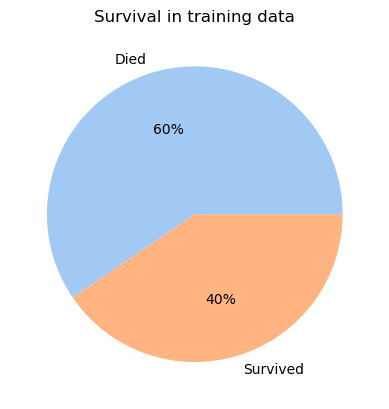

In [316]:
#survive
data = y_train["Survived"].value_counts().values
keys = ["Died","Survived"]

palette_color = sns.color_palette("pastel")

plt.title("Survival in training data")
plt.pie(data,labels = keys, colors = palette_color, autopct = '%.0f%%')

plt.show()

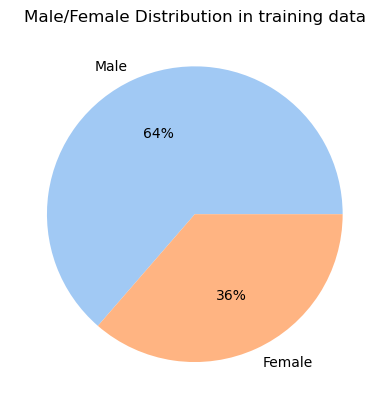

In [317]:
#gender
data = x_train["Sex"].value_counts().values
keys = ["Male","Female"]

palette_color = sns.color_palette("pastel")

plt.title("Male/Female Distribution in training data")
plt.pie(data,labels = keys, colors = palette_color, autopct = '%.0f%%')

plt.show()

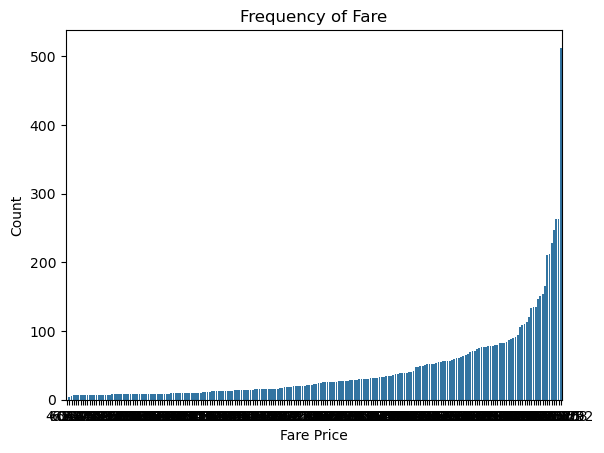

In [318]:
#fare
sns.barplot(x = x_train["Fare"].value_counts().index,
            y = x_train["Fare"].value_counts().index)

plt.title("Frequency of Fare")
plt.xlabel("Fare Price")
plt.ylabel("Count")
plt.show()

Begining Prediction using sklearn and random forest

In [319]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [320]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

c:\Users\artku\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [321]:
y_pred = rf.predict(x_test)
rf.score(x_test,y_test)

0.8096676737160121

In [322]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       204
           1       0.74      0.77      0.76       127

    accuracy                           0.81       331
   macro avg       0.80      0.80      0.80       331
weighted avg       0.81      0.81      0.81       331



In [323]:
#which features are the most important in the prediction
features = pd.DataFrame(rf.feature_importances_,index = x_train.columns)
features

,0
Pclass,0.086574
Sex,0.248744
Age,0.282951
SibSp,0.045605
Parch,0.039278
Fare,0.265301
Embarked,0.031547


Prediction with Hyper Parameters. Using the same data set but a more customized Random Forest Classifier that will hopefully return a more promising and accurate prediction

In [324]:
#hyperparameters
rf2 = RandomForestClassifier(
    n_estimators = 1000,
    criterion = "entropy",
    min_samples_split = 10,
    max_depth = 14,
    random_state = 42
)
rf2.fit(x_train,y_train)

c:\Users\artku\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [325]:
rf2.score(x_test,y_test)

0.8610271903323263

In [326]:
y_pred2 = rf2.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       204
           1       0.83      0.80      0.81       127

    accuracy                           0.86       331
   macro avg       0.86      0.85      0.85       331
weighted avg       0.86      0.86      0.86       331



In [327]:
features2 = pd.DataFrame(rf2.feature_importances_,index = x_train.columns)
features2

,0
Pclass,0.120308
Sex,0.297282
Age,0.230197
SibSp,0.049586
Parch,0.041577
Fare,0.231003
Embarked,0.030047


In [328]:
print(confusion_matrix(y_test,y_pred2))

[[184  20]
 [ 26 101]]


Logistic regression

In [329]:
from sklearn.linear_model import LogisticRegression

In [330]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int32  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int32(1), int64(4)
memory usage: 41.7 KB


In [331]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

c:\Users\artku\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\artku\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [332]:
y_pred3 = lr.predict(x_test)
lr.score(x_test,y_test)

0.918429003021148

In [333]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       204
           1       0.87      0.92      0.90       127

    accuracy                           0.92       331
   macro avg       0.91      0.92      0.91       331
weighted avg       0.92      0.92      0.92       331



In [334]:
print(confusion_matrix(y_test,y_pred3))

[[187  17]
 [ 10 117]]
